In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,roc_curve, auc,recall_score,precision_score
from sklearn.feature_selection import SelectFromModel
from tkinter import *
from tkinter import ttk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
real_ds = pd.read_csv("/Users/himanshuchuri/Desktop/Introduction_to_Data_Science/Project/Real_accounts.csv")

In [3]:
real_ds.head(10)

,follower_count,followed_count,bio,bio_Length,Bio_emoji_Count,#_tags_in_bio,Count_Uploads,isPrivate,Username_len,DigitsInUsername,FullName_len,has_ProfilePicture,Count_Mutual,isVerified,Class
0,461,1308,"['Karma', 'believer', 'Foodie', 'Movie', 'buff...",26,7,0,264,1,13,0,17,1,4,0,0
1,370,487,"['भचर', 'जलचर', 'Architectचर', 'pencilhead']",10,5,0,31,0,9,4,13,1,1,0,0
2,7730588,75,[],0,0,0,103,0,8,0,12,1,32,1,0
3,106,217,[],0,0,0,0,1,11,0,20,1,33,0,0
4,510392,201,"['I', 'live', 'for', 'the', 'future', 'of']",7,1,0,414,0,18,0,11,1,22,1,0
5,36,13,[],0,0,0,2,1,8,0,0,1,35,0,0
6,740,502,[],0,0,0,0,1,16,0,17,1,12,0,0
7,7025635,43,[],11,0,0,188,0,15,0,10,1,7,1,0
8,356,500,"['The', 'Magical', 'SoulDreamchaser', 'l', 'Ka...",8,3,0,58,1,8,0,9,1,40,0,0
9,654,318,"['Il', 'nest', 'rien', 'de', 'réel', 'que', 'l...",15,8,0,4,1,15,2,28,1,26,0,0


In [4]:
fake_ds = pd.read_csv("/Users/himanshuchuri/Desktop/Introduction_to_Data_Science/Project/Fake_accounts.csv")

In [5]:
fake_ds.shape

(693, 15)

In [6]:
real_sample = real_ds[["follower_count","followed_count","bio_Length","Bio_emoji_Count","#_tags_in_bio","Count_Uploads","isPrivate","Username_len","DigitsInUsername","FullName_len","has_ProfilePicture","Count_Mutual","isVerified", "Class"]]

In [7]:
real_sample

,follower_count,followed_count,bio_Length,Bio_emoji_Count,#_tags_in_bio,Count_Uploads,isPrivate,Username_len,DigitsInUsername,FullName_len,has_ProfilePicture,Count_Mutual,isVerified,Class
0,461,1308,26,7,0,264,1,13,0,17,1,4,0,0
1,370,487,10,5,0,31,0,9,4,13,1,1,0,0
2,7730588,75,0,0,0,103,0,8,0,12,1,32,1,0
3,106,217,0,0,0,0,1,11,0,20,1,33,0,0
4,510392,201,7,1,0,414,0,18,0,11,1,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,275,280,0,0,0,2,1,15,0,0,1,36,0,0
121,1465,1189,12,13,0,56,0,15,2,17,1,35,0,0
122,118,86,12,2,0,68,0,8,0,11,1,5,0,0
123,103,101,10,3,0,94,1,10,0,8,1,3,0,0


In [8]:
real_sample["Class"].unique()

array([0])

In [9]:
fake_sample_w_all_col = fake_ds.sample(n=200,replace=False,random_state=64,axis=0)

In [10]:
fake_sample = fake_sample_w_all_col[["follower_count","followed_count","bio_Length","Bio_emoji_Count","#_tags_in_bio","Count_Uploads","isPrivate","Username_len","DigitsInUsername","FullName_len","has_ProfilePicture","Count_Mutual","isVerified", "Class"]]

In [11]:
fake_sample

,follower_count,followed_count,bio_Length,Bio_emoji_Count,#_tags_in_bio,Count_Uploads,isPrivate,Username_len,DigitsInUsername,FullName_len,has_ProfilePicture,Count_Mutual,isVerified,Class
626,98,6337,0,0,0,16,0,13,2,0,1,0,0,1
504,94,5695,0,0,0,4,0,8,4,0,1,0,0,1
242,72,1350,4,1,0,4,0,10,1,12,1,0,0,1
136,5360,5837,8,5,0,2,1,18,0,0,1,0,0,1
334,88,4874,0,0,0,4,0,14,4,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,164,3015,5,0,0,10,0,10,1,9,1,0,0,1
389,64,1684,0,0,0,4,0,10,5,5,1,0,0,1
414,121,1000,1,0,0,22,0,6,1,9,1,0,0,1
642,120,5111,0,0,0,6,0,11,1,0,1,0,0,1


In [12]:
final_data = real_sample.append(fake_sample, ignore_index = True).sample(frac=1).reset_index(drop=True)

In [13]:
final_data

,follower_count,followed_count,bio_Length,Bio_emoji_Count,#_tags_in_bio,Count_Uploads,isPrivate,Username_len,DigitsInUsername,FullName_len,has_ProfilePicture,Count_Mutual,isVerified,Class
0,1914,1757,22,12,0,188,1,8,2,5,1,38,0,0
1,100,1930,0,0,0,4,0,11,4,0,1,0,0,1
2,370,487,10,5,0,31,0,9,4,13,1,1,0,0
3,1153,1291,0,0,0,67,1,12,0,0,1,61,0,0
4,522886,707,6,0,3,1382,0,8,0,8,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,184,2515,0,0,0,4,0,12,4,0,1,0,0,1
321,118,7363,0,0,0,4,0,7,0,0,1,0,0,1
322,49,1451,0,0,0,6,1,12,2,11,1,0,0,1
323,76,7181,0,0,0,22,0,9,4,0,1,0,0,1


In [14]:
final_data["Class"].unique()

array([0, 1])

In [15]:
lables_data = final_data[["follower_count","followed_count","bio_Length","Bio_emoji_Count","#_tags_in_bio","Count_Uploads","isPrivate","Username_len","DigitsInUsername","FullName_len","has_ProfilePicture","Count_Mutual","isVerified"]]

In [16]:
class_data = final_data[['Class']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(lables_data, class_data,test_size = 0.2, random_state=42, shuffle=True)

In [46]:
model = XGBClassifier(use_label_encoder=False,eval_metric = 'error')
model.fit(X_train, y_train.values.ravel())


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [47]:
model.save_model("model_1.json")

In [48]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [49]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.92%


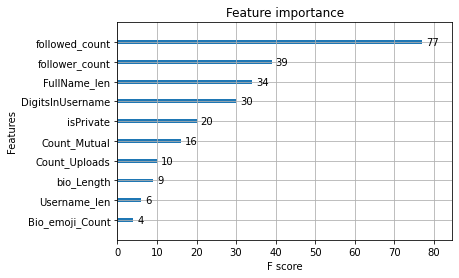

In [50]:
plot_importance(model)
plt.show()

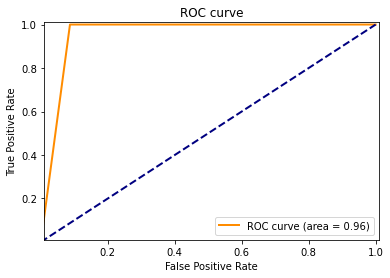

In [51]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.01])
plt.ylim([0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
m1 = XGBClassifier()
m1.load_model("/Users/himanshuchuri/Desktop/Introduction_to_Data_Science/model_1.json")

In [53]:
print(m1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


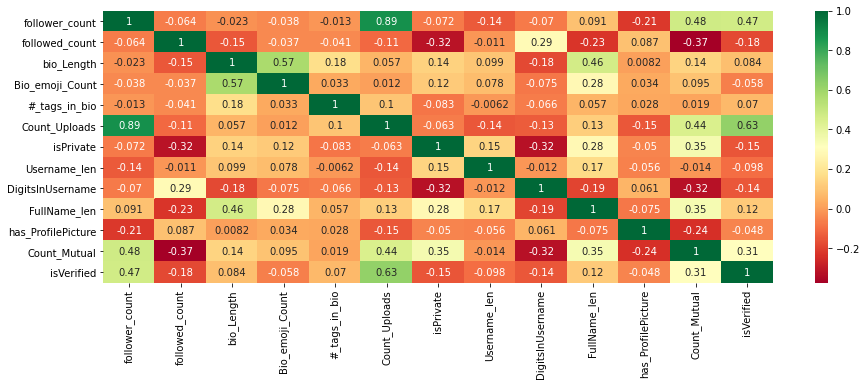

In [66]:
plt.figure(figsize=(15,5))
g=sns.heatmap(lables_data.corr(method='pearson'),annot=True,cmap="RdYlGn")

In [54]:
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds[:-2]:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    selection_model = XGBClassifier(use_label_encoder=False,eval_metric = 'error')
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("columns = " + str(selection.get_feature_names_out(["follower_count","followed_count","bio_Length","Bio_emoji_Count","#_tags_in_bio","Count_Uploads","isPrivate","Username_len","DigitsInUsername","FullName_len","has_ProfilePicture","Count_Mutual","isVerified"])))
    print("\n")

/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packag

Thresh=0.000, n=13, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'bio_Length' 'Bio_emoji_Count'
 '#_tags_in_bio' 'Count_Uploads' 'isPrivate' 'Username_len'
 'DigitsInUsername' 'FullName_len' 'has_ProfilePicture' 'Count_Mutual'
 'isVerified']


Thresh=0.000, n=13, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'bio_Length' 'Bio_emoji_Count'
 '#_tags_in_bio' 'Count_Uploads' 'isPrivate' 'Username_len'
 'DigitsInUsername' 'FullName_len' 'has_ProfilePicture' 'Count_Mutual'
 'isVerified']


Thresh=0.000, n=13, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'bio_Length' 'Bio_emoji_Count'
 '#_tags_in_bio' 'Count_Uploads' 'isPrivate' 'Username_len'
 'DigitsInUsername' 'FullName_len' 'has_ProfilePicture' 'Count_Mutual'
 'isVerified']


Thresh=0.002, n=10, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'bio_Length' 'Bio_emoji_Count'
 'Count_Uploads' 'isPrivate' 'Username_len' 'DigitsInUsername'
 'FullName_len' 'Count_Mutual']


Thresh=

/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packag

columns = ['follower_count' 'followed_count' 'bio_Length' 'Count_Uploads'
 'isPrivate' 'Username_len' 'DigitsInUsername' 'FullName_len'
 'Count_Mutual']


Thresh=0.005, n=8, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'Count_Uploads' 'isPrivate'
 'Username_len' 'DigitsInUsername' 'FullName_len' 'Count_Mutual']


Thresh=0.005, n=7, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'Count_Uploads' 'isPrivate'
 'Username_len' 'FullName_len' 'Count_Mutual']


Thresh=0.008, n=6, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'Count_Uploads' 'isPrivate'
 'FullName_len' 'Count_Mutual']


Thresh=0.012, n=5, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'Count_Uploads' 'isPrivate'
 'Count_Mutual']


Thresh=0.013, n=4, Accuracy: 96.92%
columns = ['follower_count' 'followed_count' 'isPrivate' 'Count_Mutual']


Thresh=0.017, n=3, Accuracy: 96.92%
columns = ['followed_count' 'isPrivate' 'Count_Mutual']




/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/himanshuchuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
New_Data = lables_data[['follower_count', 'followed_count' ,'bio_Length', 'isPrivate', 'DigitsInUsername' ,'Count_Mutual']]

In [56]:
New_Data

,follower_count,followed_count,bio_Length,isPrivate,DigitsInUsername,Count_Mutual
0,1914,1757,22,1,2,38
1,100,1930,0,0,4,0
2,370,487,10,0,4,1
3,1153,1291,0,1,0,61
4,522886,707,6,0,0,13
...,...,...,...,...,...,...
320,184,2515,0,0,4,0
321,118,7363,0,0,0,0
322,49,1451,0,1,2,0
323,76,7181,0,0,4,0


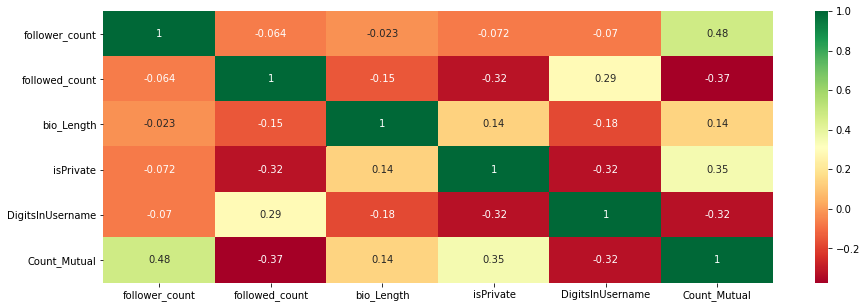

In [57]:
plt.figure(figsize=(15,5))
g=sns.heatmap(New_Data.corr(method='pearson'),annot=True,cmap="RdYlGn")

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(New_Data, class_data,test_size = 0.2, random_state=42, shuffle=True)

In [59]:
model1 = XGBClassifier(use_label_encoder=False,eval_metric = 'error')
model1.fit(X_train1, y_train1.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [60]:
model1.save_model("model_small.json")

In [61]:
y_pred1 = model1.predict(X_test1)
predictions1 = [round(value) for value in y_pred1]

In [62]:
accuracy = accuracy_score(y_test1, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.46%


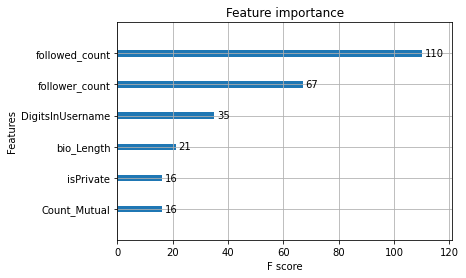

In [63]:
plot_importance(model1)
plt.show()

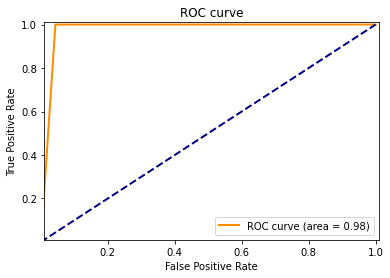

In [64]:
fpr, tpr, _ = roc_curve(y_test1, predictions1)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.01])
plt.ylim([0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
ms = XGBClassifier()
ms.load_model("/Users/himanshuchuri/Desktop/Introduction_to_Data_Science/model_small.json")

In [65]:
from tkinter import *
from tkinter import ttk
import pandas as pd
from xgboost import XGBClassifier




class Application(Frame):
    def __init__(self, master=None):
        Frame.__init__(self, master)
        self.create_widgets()
        
    def create_widgets(self):
        win.geometry("720x680")
        win.title('IDS')
        diction = {'follower_count' : [0],'followed_count' :[0],'bio_Length' :[0],'isPrivate':[0],'DigitsInUsername':[0],'Count_Mutual':[0]}


        def display_text():
            if (a.get().isnumeric() and b.get().isnumeric() and c.get().isnumeric() and d.get().isnumeric() and e.get().isnumeric() and f.get().isnumeric()) == True:
                mf = XGBClassifier()
                mf.load_model("./model_small.json")
                diction['follower_count'][0] = int(a.get())
                diction['followed_count'][0] = int(b.get())
                diction['bio_Length'][0] = int(c.get())
                diction['isPrivate'][0] = int(d.get())
                diction['DigitsInUsername'][0] = int(e.get())
                diction['Count_Mutual'][0] = int(f.get())
                pred_data = pd.DataFrame(data = diction)
                result = mf.predict(pred_data)
                if int(result[0]) == 0:
                    ans = "Account is Real"
                else:
                    ans = "Account is Fake"
            else: 
                ans = "Check Inputs!"

            label.configure(text=ans)

        l1=Label(win, text="", font=("Courier 22 bold"))
        l1.pack()

        la=Label(win, text="Number of Followers")
        la.pack()
        a= Entry(win, width= 40, text = "follower_count")
        a.pack()

        l2=Label(win, text="", font=("Courier 22 bold"))
        l2.pack()

        lb=Label(win, text="Number of Following")
        lb.pack()
        b= Entry(win, width= 40, text = 'followed_count')
        b.pack()

        l3=Label(win, text="", font=("Courier 22 bold"))
        l3.pack()

        lc=Label(win, text="Number of Space seperated words/symbols in Bio")
        lc.pack()
        c= Entry(win, width= 40, text = "bio_Length")
        c.pack()

        l4=Label(win, text="", font=("Courier 22 bold"))
        l4.pack()

        ld=Label(win, text="Is account Private? (1 = Yes) (0 = No)")
        ld.pack()
        d= Entry(win, width= 40, text = "isPrivate")
        d.pack()

        l5=Label(win, text="", font=("Courier 22 bold"))
        l5.pack()

        le=Label(win, text="Number of Digits in Username")
        le.pack()
        e= Entry(win, width= 40, text = "DigitsInUsername")
        e.pack()

        l6=Label(win, text="", font=("Courier 22 bold"))
        l6.pack()

        lf=Label(win, text="Number Mutual Contacts")
        lf.pack()
        f= Entry(win, width= 40, text = "Count_Mutual")
        f.pack()

        l6=Label(win, text="", font=("Courier 22 bold"))
        l6.pack()

        ttk.Button(win, text= "Okay",width= 20, command= display_text).pack(pady=20)

        label=Label(win, text="", font=("Courier 22 bold"))
        label.pack()

if __name__ == "__main__":
    win = Tk()
    Application(win)
    win.mainloop()